In [2]:
library(tidyverse)

In [87]:
data_preprocessed = read.csv("data_preprocessed.csv",header = T)
data = data_preprocessed
head(data)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_price,Age,HasBasement,HasGarage,HasFireplace
60,RL,65,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,12.24770,5,Yes,Yes,No
20,RL,80,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,12.10902,31,Yes,Yes,Yes
60,RL,68,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,12.31717,7,Yes,Yes,Yes
70,RL,60,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,11.84940,91,Yes,Yes,Yes
60,RL,84,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,12.42922,8,Yes,Yes,Yes
50,RL,85,9.555064,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,700,10,2009,WD,Normal,11.87061,16,Yes,Yes,No


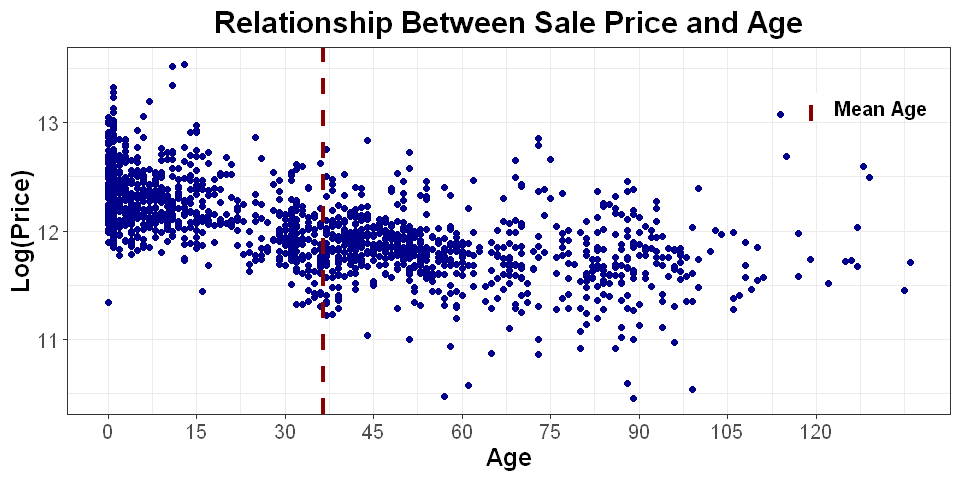

In [45]:
options(repr.plot.width = 8, repr.plot.height = 4)
mean_age = mean(data[,"Age"])

data%>%
    ggplot()+
    geom_point(aes(Age, log_price), color = "darkblue")+
    labs(title = "Relationship Between Sale Price and Age", x = "Age", y = "Log(Price)")+
    scale_x_continuous(breaks = seq(0,120,15))+
    geom_vline(data = data,aes(xintercept = mean_age, linetype = "Mean Age"),size = 1.3,color = "darkred")+
    scale_linetype_manual(values = c("Mean Age" = "dashed"))+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
          axis.title = element_text(size = 15, face = "bold"),
          axis.text = element_text(size = 12),
          legend.title = element_blank(),
          legend.background = element_blank(),
          legend.text = element_text(size = 12, face = "bold"),legend.position = c(0.90,0.85))

In [98]:
data%>%
    mutate(OverallQual = as.factor(OverallQual))%>%
    group_by(OverallQual)%>%
    summarise(Count = n(),
              mean = round(mean(exp(log_price)), 0),
              ci = paste0("\u00B1 ", round(1.96*(sd(exp(log_price)) / sqrt(nrow(data)))), 2),
              "Mean Sale Price" = paste0(mean, " (", ci, ")"),
              "Median Age" = round(median(Age),0))%>%
    rename("Overall Quality" = "OverallQual")%>%
    select(-c(mean,ci))

Overall Quality,Count,Mean Sale Price,Median Age
1,2,50151 (± 7872),74
2,3,51771 (± 7312),73
3,20,87475 (± 12662),73
4,116,108422 (± 14892),54
5,397,133524 (± 13902),49
6,374,161604 (± 18512),37
7,319,207717 (± 22812),8
8,168,274737 (± 32782),5
9,43,367514 (± 41692),2
10,18,438589 (± 81962),1
